In [131]:
from turtle import color
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm



In [44]:
df = pd.read_excel('./cleaned_data.xlsx', engine='openpyxl')

In [45]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143708 entries, 0 to 143707
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             143708 non-null  object 
 1   Property_id               143708 non-null  int64  
 2   Property_type             143708 non-null  object 
 3   Property_status           143708 non-null  object 
 4   Price_per_unit_area       143708 non-null  object 
 5   Posted_On                 143708 non-null  object 
 6   Project_URL               143708 non-null  object 
 7   builder_id                143708 non-null  int64  
 8   Builder_name              143708 non-null  object 
 9   Property_building_status  143708 non-null  object 
 10  City_id                   143708 non-null  int64  
 11  City_name                 143708 non-null  object 
 12  No_of_BHK                 143708 non-null  object 
 13  Locality_ID               143708 non-null  i

In [49]:
#intial preprocessing of data
df['Price']= df['Price'].str.replace(',','')
df['Price']= df['Price'].astype(int)

df['Size']= df['Size'].str.replace(',','')
df['Size']= df['Size'].str.replace('s','')
df['Size']= df['Size'].str.replace('q','')
df['Size']= df['Size'].str.replace('f','')
df['Size']= df['Size'].str.replace('t','')
df['Size']= df['Size'].astype(int)


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143708 entries, 0 to 143707
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             143708 non-null  object 
 1   Property_id               143708 non-null  int64  
 2   Property_type             143708 non-null  object 
 3   Property_status           143708 non-null  object 
 4   Price_per_unit_area       34 non-null      object 
 5   Posted_On                 143708 non-null  object 
 6   Project_URL               143708 non-null  object 
 7   builder_id                143708 non-null  int64  
 8   Builder_name              143708 non-null  object 
 9   Property_building_status  143708 non-null  object 
 10  City_id                   143708 non-null  int64  
 11  City_name                 143708 non-null  object 
 12  No_of_BHK                 143708 non-null  object 
 13  Locality_ID               143708 non-null  i

### Question-1: Dividing overall opportunities in three ranges

In [50]:
df.sort_values(by=['Price'], inplace=True)

In [51]:
df1 = df[['Property_id', 'Price']]


In [52]:
df1.Price.describe()

count    1.437080e+05
mean     1.365094e+07
std      1.940871e+07
min      1.000000e+05
25%      5.259438e+06
50%      8.500000e+06
75%      1.549800e+07
max      8.000000e+08
Name: Price, dtype: float64

Text(0.5, 1.0, 'Budget Info')

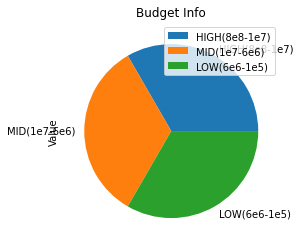

In [53]:
# Budget division into high and medium and low 

val1 = df1.Price.iloc[0]
val2 = df1.Price.iloc[47902]
val3 = df1.Price.iloc[95805]
val4 = df1.Price.iloc[143707]
# using Pie chart to show the different budget range.
x= pd.DataFrame({'Range' : ['HIGH(8e8-1e7)', 'MID(1e7-6e6)', 'LOW(6e6-1e5)'], 'Value' : [47902,47902,47902]})
k = x.plot(kind='pie', y='Value', labels = x["Range"])
k.set_title('Budget Info')
#k.set_label('HiGH','MID')





### Question-2 Techemerging cities and ready to move

In [54]:
#preprocessing the dataset to contain only mentioned cities
df_q2 = df.loc[(df['City_name'] == 'Hyderabad')|(df['City_name'] == 'Bangalore')|(df['City_name'] == 'Chennai')]
#df_q2.info()

#ready to move only

df_q2_r = df_q2.loc[(df_q2['is_ready_to_move']==True)]
df_q2_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22898 entries, 54795 to 56417
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property_Name             22898 non-null  object 
 1   Property_id               22898 non-null  int64  
 2   Property_type             22898 non-null  object 
 3   Property_status           22898 non-null  object 
 4   Price_per_unit_area       1 non-null      object 
 5   Posted_On                 22898 non-null  object 
 6   Project_URL               22898 non-null  object 
 7   builder_id                22898 non-null  int64  
 8   Builder_name              22898 non-null  object 
 9   Property_building_status  22898 non-null  object 
 10  City_id                   22898 non-null  int64  
 11  City_name                 22898 non-null  object 
 12  No_of_BHK                 22898 non-null  object 
 13  Locality_ID               22898 non-null  int64  
 14  Lo

Text(0.5, 1.0, 'Ready to move cities info')

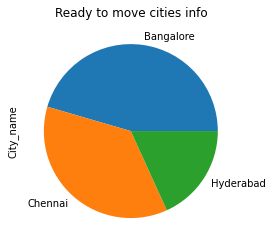

In [55]:
#visualizing the cities with their respective status.
TE = df_q2_r['City_name'].value_counts()
TE_P= TE.plot(kind='pie')
TE_P.set_title("Ready to move cities info")

Text(0.5, 1.0, 'Ready to move cities info')

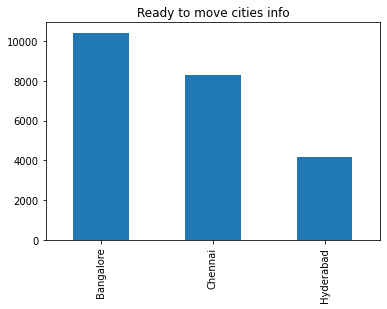

In [56]:
TE_P= TE.plot(kind='bar')
TE_P.set_title("Ready to move cities info")

### Question-3: Large Area with relative 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143708 entries, 60240 to 141415
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             143708 non-null  object 
 1   Property_id               143708 non-null  int64  
 2   Property_type             143708 non-null  object 
 3   Property_status           143708 non-null  object 
 4   Price_per_unit_area       34 non-null      object 
 5   Posted_On                 143708 non-null  object 
 6   Project_URL               143708 non-null  object 
 7   builder_id                143708 non-null  int64  
 8   Builder_name              143708 non-null  object 
 9   Property_building_status  143708 non-null  object 
 10  City_id                   143708 non-null  int64  
 11  City_name                 143708 non-null  object 
 12  No_of_BHK                 143708 non-null  object 
 13  Locality_ID               143708 non-nul

In [58]:
df.sort_values(by=['Size'], inplace=True)

In [59]:
df.Size.describe()

count    143708.000000
mean       1277.933247
std         951.101861
min         100.000000
25%         720.000000
50%        1076.000000
75%        1516.000000
max       90000.000000
Name: Size, dtype: float64

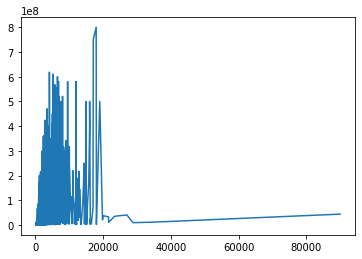

In [60]:
plt.plot(df.Size,df.Price)
plt.show()

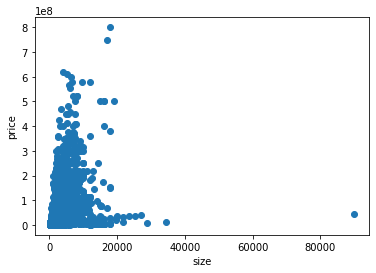

In [61]:
#scatter plot for the size to price data.
plt.scatter(df.Size,df.Price)
plt.xlabel('size')
plt.ylabel('price')
plt.show()

### Question-4: 

In [63]:
df_q4_1 = df.loc[(df['City_name'] == 'Ahmedabad')]
df_q4_2 = df.loc[(df['City_name'] == 'Bangalore')]
df_q4_3 = df.loc[(df['City_name'] == 'Chennai')]
df_q4_4 = df.loc[(df['City_name'] == 'Delhi')]
df_q4_5 = df.loc[(df['City_name'] == 'Hyderabad')]
df_q4_6 = df.loc[(df['City_name'] == 'Kolkata')]
df_q4_7 = df.loc[(df['City_name'] == 'Lucknow')]
df_q4_8 = df.loc[(df['City_name'] == 'Mumbai')]



In [64]:
df_q4_1.sort_values(by=['Locality_ID'], inplace=True)
df_q4_2.sort_values(by=['Locality_ID'], inplace=True)
df_q4_3.sort_values(by=['Locality_ID'], inplace=True)
df_q4_4.sort_values(by=['Locality_ID'], inplace=True)
df_q4_5.sort_values(by=['Locality_ID'], inplace=True)
df_q4_6.sort_values(by=['Locality_ID'], inplace=True)
df_q4_7.sort_values(by=['Locality_ID'], inplace=True)
df_q4_8.sort_values(by=['Locality_ID'], inplace=True)

Ahmedabad = len(df_q4_1)
Bangalore = len(df_q4_2)
Chennai = len(df_q4_3)
Delhi = len(df_q4_4)
hyderabad = len(df_q4_5)
Kolkata = len(df_q4_6)
Lucknow = len(df_q4_7)
Mumbai = len(df_q4_8)

dataFrame_Cities = {'AHD':Ahmedabad, 'BLE':Bangalore , 'CHN':Chennai, 'DHI': Delhi, 'HYD': hyderabad,'KLK': Kolkata,'LKW': Lucknow,'MI': Mumbai}
        

C:\Users\ragha\AppData\Local\Temp\ipykernel_9876\697014350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q4_1.sort_values(by=['Locality_ID'], inplace=True)
C:\Users\ragha\AppData\Local\Temp\ipykernel_9876\697014350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q4_2.sort_values(by=['Locality_ID'], inplace=True)
C:\Users\ragha\AppData\Local\Temp\ipykernel_9876\697014350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


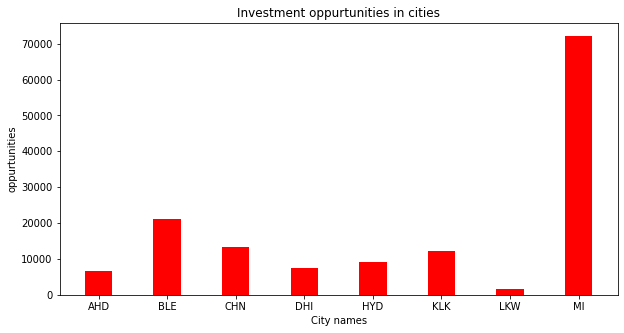

In [65]:
#Visualization-1: oppurtunities with resoect to cities for the investor to invest in a particular city or diversify the investments accordingly
dataFrame_Cities = {'AHD':Ahmedabad, 'BLE':Bangalore , 'CHN':Chennai, 'DHI': Delhi, 'HYD': hyderabad,'KLK': Kolkata,'LKW': Lucknow,'MI': Mumbai}
cities = list(dataFrame_Cities.keys())
Values = list(dataFrame_Cities.values())

Plot_q4= plt.figure(figsize = (10, 5))

plt.bar(cities, Values, color ='red', width = 0.4)
plt.xlabel("City names")
plt.ylabel("oppurtunities")
plt.title("Investment oppurtunities in cities")
plt.show()


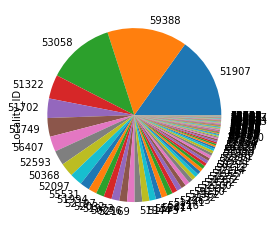

In [66]:
#visualization2: INvestment oppurtunities according to the regions in a particular city.
#df_q4_1.Locality_ID

#ahmedabad locality frequency of the locations for the investment.
ab = df_q4_1['Locality_ID'].value_counts(normalize=True)
ab_p = ab.plot(kind='pie')

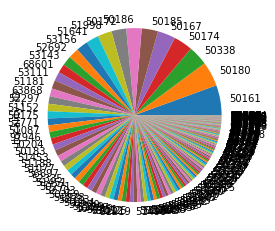

In [67]:
#Bangalore locality frequency of the locations 
Bl = df_q4_2['Locality_ID'].value_counts(normalize=True)
Bl_p = Bl.plot(kind = 'pie')

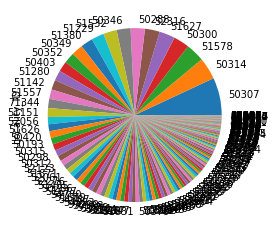

In [68]:
#Chennai locality frequency of the locations 
Cl = df_q4_3['Locality_ID'].value_counts(normalize=True)
Cl_p = Cl.plot(kind = 'pie')

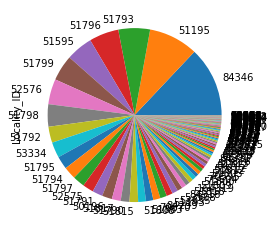

In [69]:
#Delhi locality frequency of the locations 
dl = df_q4_4['Locality_ID'].value_counts(normalize=True)
dl_p = dl.plot(kind = 'pie')


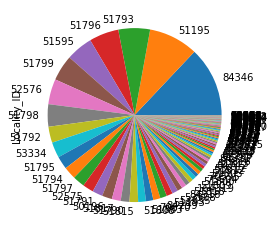

In [70]:
#Hyderabad locality frequency of the locations 
hl = df_q4_4['Locality_ID'].value_counts(normalize=True)
hl_p = hl.plot(kind = 'pie')

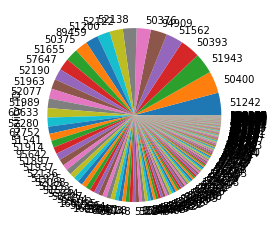

In [71]:
#Kolkata locality frequency of the locations 
Kl = df_q4_5['Locality_ID'].value_counts(normalize=True)
kl_p = Kl.plot(kind = 'pie')

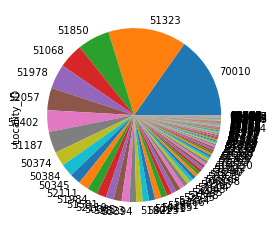

In [72]:
#Lucknow locality frequency of the locations 
Ll = df_q4_6['Locality_ID'].value_counts(normalize=True)
Ll_p = Ll.plot(kind = 'pie')

In [ ]:
df_q4_7.reset_index(inplace=True)
df_q4_7

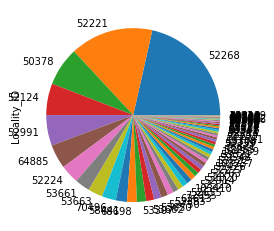

In [89]:
#Mumbai locality frequency of the location

ml = df_q4_7['Locality_ID'].value_counts(normalize=True)
ml_p = ml.plot(kind = 'pie')

### Question-5 : Hotspots in Mumbai, Ahmedhabad.

In [74]:
# pulling out the data in mumabi and ahmedabad.
df_q5_m = df.loc[(df['City_name'] == 'Mumbai')]
df_q5_a = df.loc[(df['City_name'] == 'Ahmedabad')]


#### Mumbai

C:\Users\ragha\AppData\Local\Temp\ipykernel_9876\3852317346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q5_m1.sort_values(by=['Locality_ID'], inplace=True)


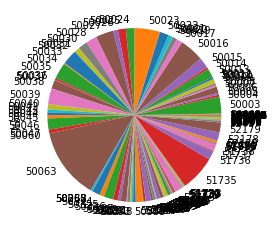

In [134]:
#proceeding with the mumbai listings comparing the price to get a view on the property value in the city to choose the best
#using maximum value of x*y where x is the average price of the listings in that area and y is the total no of listings in that area.
df_q5_m1=df_q5_m[['Locality_ID','Price']]
df_q5_m1.sort_values(by=['Locality_ID'], inplace=True)
df_q5_m2 = df_q5_m1['Locality_ID'].value_counts(sort=False)
df_q5_m1 = df_q5_m1.groupby('Locality_ID').mean()
df_q5_ms = df_q5_m1.iloc[:,0]
df_final_mi = df_q5_m2.mul(df_q5_ms)
dfp = df_final_mi.plot(kind = 'pie')




([<matplotlib.axis.XTick at 0x269a9ed5c30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

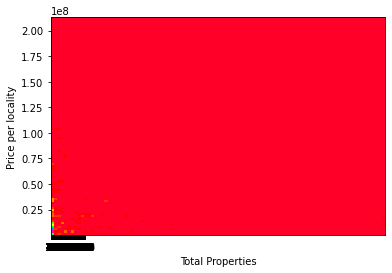

In [137]:
plt.hist2d(df_q5_m2,df_q5_ms,bins=100,cmap=cm.gist_rainbow)
plt.xlabel('Total Properties')
plt.ylabel('Price per locality')
plt.xticks(range(0,1000))

#### Ahmedabad

C:\Users\ragha\AppData\Local\Temp\ipykernel_9876\2186428355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q5_a1.sort_values(by=['Locality_ID'], inplace=True)


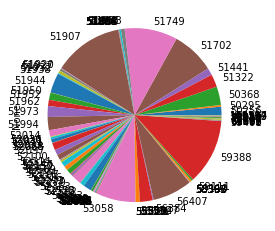

In [124]:
# proceeding as same as Mumbai.
df_q5_a1=df_q5_a[['Locality_ID','Price']]
df_q5_a1.sort_values(by=['Locality_ID'], inplace=True)
df_q5_a2 = df_q5_a1['Locality_ID'].value_counts(sort=False)
df_q5_a1 = df_q5_a1.groupby('Locality_ID').mean()
df_q5_as = df_q5_a1.iloc[:,0]
df_final_ai = df_q5_a2.mul(df_q5_as)
dfpa = df_final_ai.plot(kind = 'pie')



Text(0, 0.5, 'Price per locality')

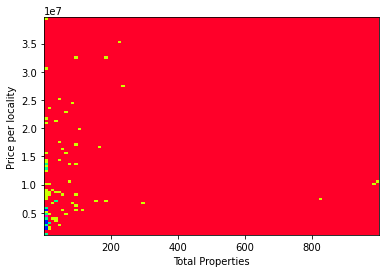

In [130]:
plt.hist2d(df_q5_a2,df_q5_as,bins=100,cmap=cm.gist_rainbow)
plt.xlabel('Total Properties')
plt.ylabel('Price per locality')

#### Observations and results.
#### Q1: For Q1 we divided the data into the three parts using 33% ,66% as boundaries and shown the results accordingly
#### Q2: For Q2 pulling the only data asked and plotted the bar and pie chart as which shows the no of properties which are ready to move so the investor have a freedom to choose whatever he needed.
#### Q3: For Q3 we usen the size per price comparison considering the size first since investors prioritised it first then we can used the properties with relative less compared to that of it.
#### Q4: For Q4 the investors can look into the total available properties using bar plot and if they need to invest in a certain city they can furthur look into the pie chart shown. which has no of listings in an area. If the investor wants to invest all of them in one place he can pick the one with higher listings or choose the smaller listigs ones to diversify the investments.
#### Q5: for determining the Hot spot for a certain place to invest we used (no of properties and price_perlocality.) . First factor to be price per locality which determines the property value of that place, next is total no of listings, both should be high for the office place. since the property value place role in determining the best place.